In [1]:
#imports
from functions import blurring, one_plot
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import LeaveOneOut

In [2]:
#data loading for experiment 57
a = blurring("data/exp57/control/")
b = blurring('data/exp57/Treated/')
image_matrix = np.concatenate((a, b))

100%|██████████| 31/31 [00:18<00:00,  1.65it/s]


0.4626865671641791


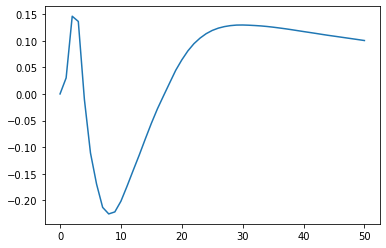

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

Y = np.zeros(image_matrix.shape[0], dtype=bool)
Y[36::] = 1

Y_pred = cross_val_predict(lr, image_matrix, Y, cv=LeaveOneOut())
print(accuracy_score(Y, Y_pred))

lr.fit(image_matrix, Y)
plt.plot(lr.coef_.T);

In [13]:
Y_pred = cross_val_predict(lr, image_matrix[:, 0:20], Y, cv=LeaveOneOut())
print(accuracy_score(Y, Y_pred))

0.4626865671641791


100%|██████████| 18/18 [00:10<00:00,  1.64it/s]


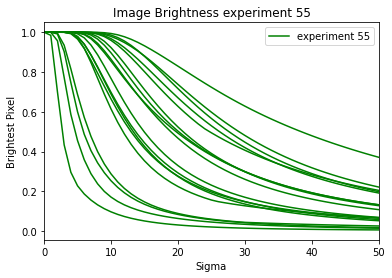

100%|██████████| 27/27 [00:16<00:00,  1.65it/s]


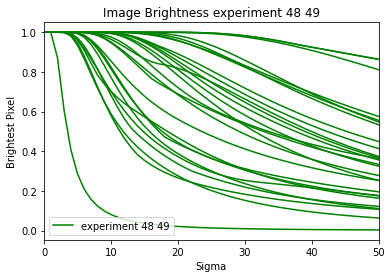

In [4]:
#generate plots
y_val55 = blurring('data/exp55/')
one_plot(y_val55, 'experiment 55')

y_val4 = blurring('data/exp48.49//')
one_plot(y_val4, 'experiment 48 49')

# question: what is being compared within ex 55 and 48/49? what are the different var groups 